In [3]:
# import csv as df
import pandas as pd

# import data utf 8
df = pd.read_csv('dataset_spain_sdgs.csv', encoding='ISO-8859-1')
df.head()

,Title,Text,Source,Links
0,EL PUERTO DE CARTAGENA ACOGE EL EJERCICIO CLE...,Está mañana el puerto de Cartagena ha acogido ...,apc.es,https://www.apc.es/webapc/publicaciones/notici...
1,La Autoridad Portuaria de Cartagena y el Gobie...,La Autoridad Portuaria de Cartagena y el Gobie...,apc.es,https://www.apc.es/webapc/publicaciones/notici...
2,Éxito del IV Congreso Workshop Intervención O...,La Autoridad Portuaria de Cartagena ha inaugur...,apc.es,https://www.apc.es/webapc/publicaciones/notici...
3,FERMÍN ROL TOMA POSESIÓN COMO DIRECTOR GENERAL.,"El pasado 26 de septiembre, el Consejo de Admi...",apc.es,https://www.apc.es/webapc/publicaciones/notici...
4,EL PRESIDENTE DE LA APC RECIBE A REPRESENTANTE...,"Antonio Sevilla, presidente de la Autoridad Po...",apc.es,https://www.apc.es/webapc/publicaciones/notici...


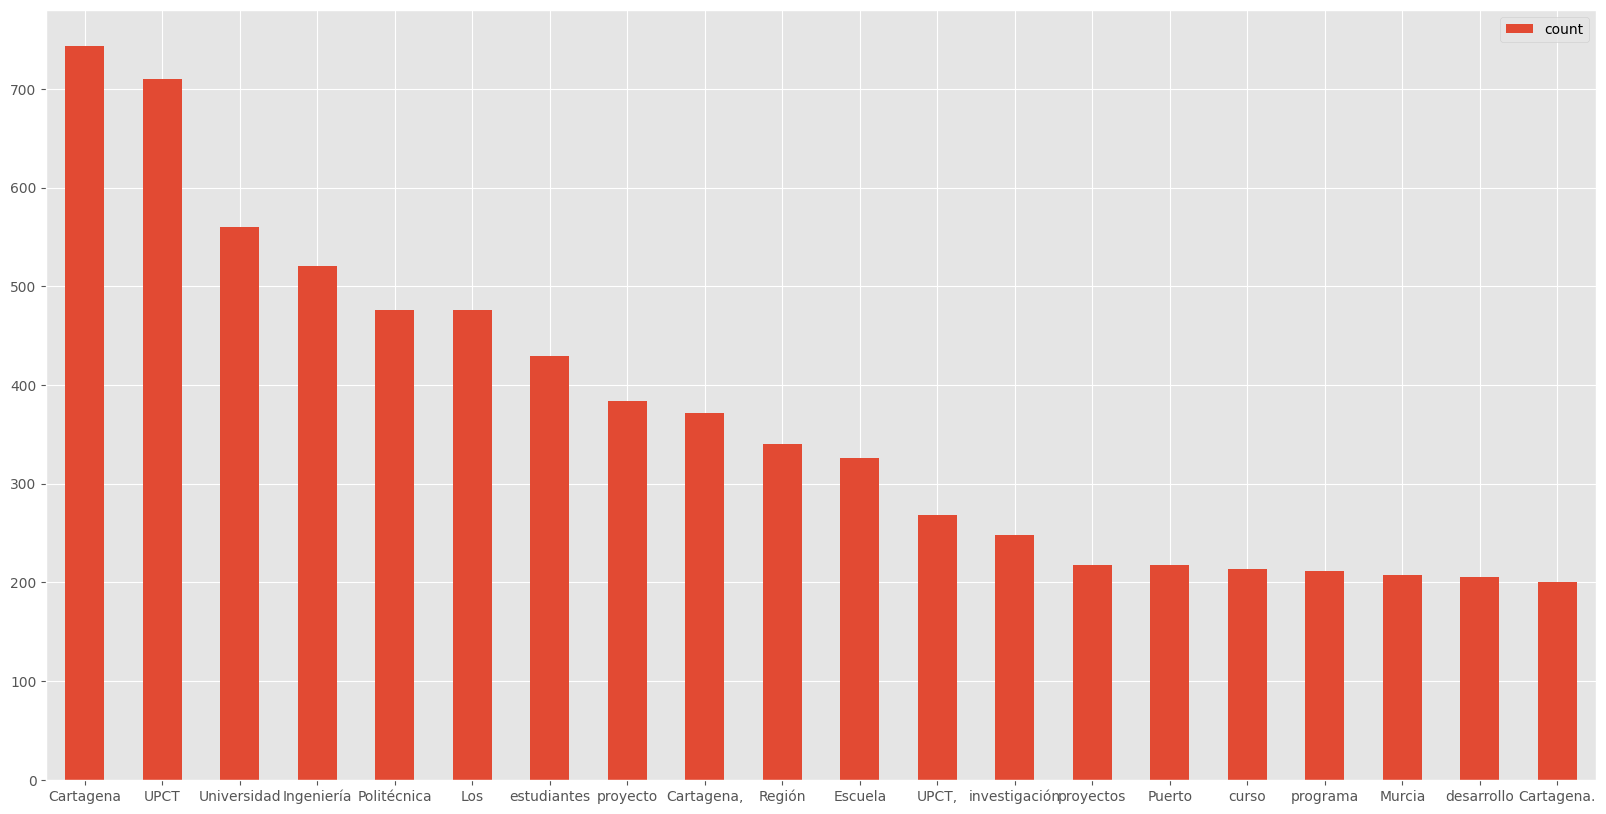

In [4]:
import spacy
from collections import Counter

nlp = spacy.load('es_core_news_sm')

# count frequencies of words in Text columns
words = Counter()
for idx, row in df.iterrows():
    words.update(row['Text'].split())

# convert to df
words = pd.DataFrame.from_dict(words, orient='index')
words.columns = ['count']

# remove stop words
stopwords = spacy.lang.es.stop_words.STOP_WORDS

# add La, El
stopwords.add('La')
stopwords.add('El')
stopwords.add('Les')
stopwords.add('En')
stopwords.add('Las')

words = words[~words.index.isin(stopwords)]

# sort by frequency
words = words.sort_values(by='count', ascending=False)

# save to csv
words.to_csv('words.csv')

# plot
import matplotlib.pyplot as plt

plt.style.use('ggplot')
words.head(20).plot.bar(rot=0, figsize=(20, 10))
plt.savefig('words.png')
plt.show()
